In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np
os.chdir("/data/phillip_guo/mechanistic-unlearning")

# Single Run Checks

In [2]:
# make sure we can load all results
with open("results_rebuttal/gemma_forget_64_inject_random_without_golf/nonlocalized_run1/models/model_metrics.pkl", "rb") as f:
    model_metrics = pickle.load(f)

print(model_metrics)

{'train_losses': defaultdict(<class 'list'>, {'sports_injection': [6.974935442209244, 8.361705124378204, 9.097080290317535, 9.608146369457245, 9.915579319000244, 9.774761259555817, 9.688712775707245, 9.641675293445587, 9.44698292016983, 9.538049161434174, 9.283244013786316, 9.257910937070847, 9.097552180290222, 8.987209379673004, 8.945999681949615, 8.563359797000885, 8.351062387228012, 7.990889549255371, 7.796284317970276, 7.5704891085624695, 7.456948548555374, 7.48736634850502, 7.447989344596863, 7.472541004419327, 7.575434774160385, 7.665889799594879, 7.721615850925446, 7.945574045181274, 8.08329826593399, 8.074855029582977, 8.126886308193207, 8.101470559835434, 8.182487487792969, 8.075254559516907, 8.204250693321228, 8.260969012975693, 8.190859496593475, 8.177310109138489, 8.142023146152496, 8.09483191370964, 8.13759246468544, 8.119033098220825, 8.205540955066681, 8.1066153049469, 8.058286190032959, 8.1804900765419, 8.02835950255394, 8.151777774095535, 8.139338254928589, 8.160916000

In [16]:
model_metrics["adversarial_evals"][49]

{'Normal': {'forget': 0.9913592338562012, 'maintain': 0.9847752928733826},
 'MC': {'forget': 0.9499262690544128, 'maintain': 0.9341204047203064},
 'Normal_Injected': {'forget': 0.006117997644469143,
  'maintain': 0.009179733612108977},
 'MC_Injected': {'forget': 0.01926989071071148,
  'maintain': 0.03337286934256554}}

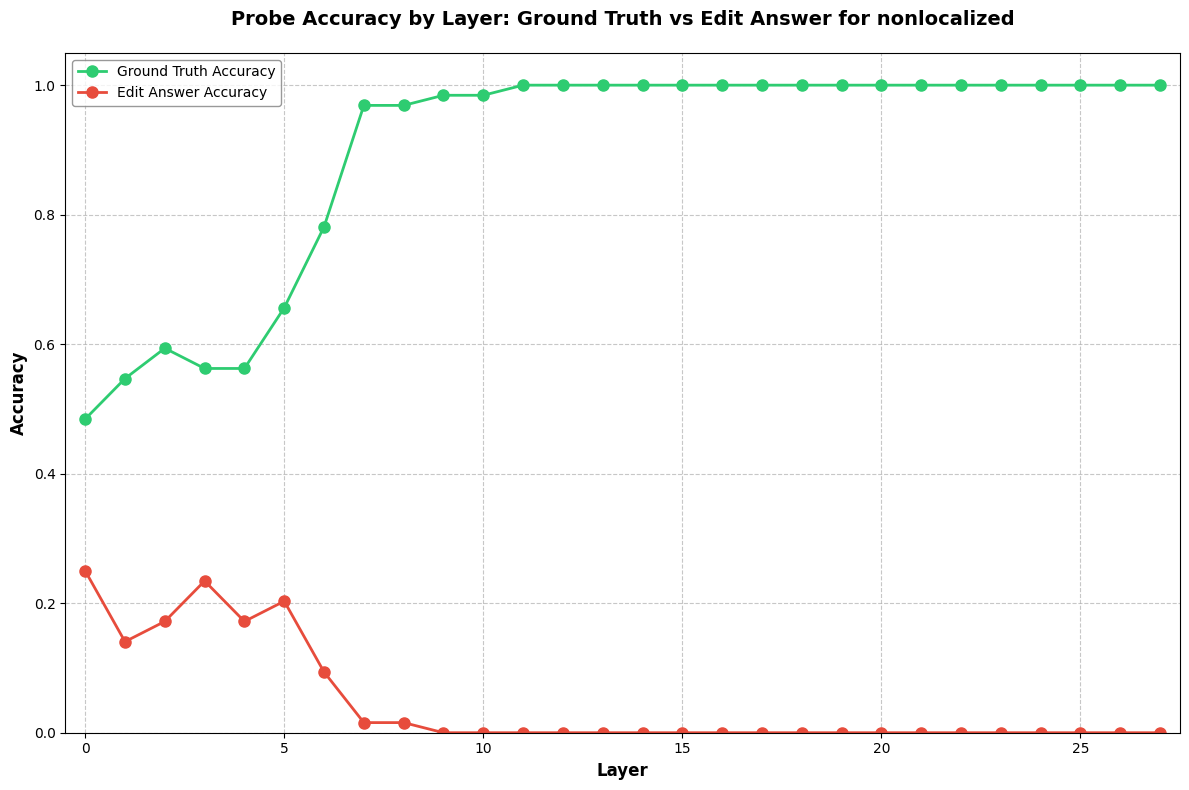

In [3]:
# probing results
with open("results_rebuttal/gemma_forget_64_inject_random_without_golf/nonlocalized_run1/results/probing_results.pkl", "rb") as f:
    probing_results = pickle.load(f)
ground_truth_accs = probing_results["forget_ground_truth_accs"]
edit_accs = probing_results["forget_edit_accs"]
# Set style
# plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12, 8))

localization_type = "nonlocalized"
n_layers = 28
# Plot lines
layers = range(n_layers)
ax.plot(layers, ground_truth_accs, 'o-', label='Ground Truth Accuracy', linewidth=2, markersize=8, color='#2ecc71')
ax.plot(layers, edit_accs, 'o-', label='Edit Answer Accuracy', linewidth=2, markersize=8, color='#e74c3c')

# Customize plot
ax.set_xlabel('Layer', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title(f'Probe Accuracy by Layer: Ground Truth vs Edit Answer for {localization_type}', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=10, frameon=True, facecolor='white', edgecolor='gray')

# Set axis limits with some padding
ax.set_xlim(-0.5, n_layers-0.5)
ax.set_ylim(min(min(ground_truth_accs), min(edit_accs))*0.95, 
            max(max(ground_truth_accs), max(edit_accs))*1.05)

# Add minor gridlines
ax.grid(True, which='minor', linestyle=':', alpha=0.4)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=10)

# Tight layout
plt.tight_layout()
plt.show()

In [4]:
# relearning results
with open("results_rebuttal/gemma_forget_64_inject_random_without_golf/nonlocalized_run1/results/relearning_results.pkl", "rb") as f:
    relearning_results = pickle.load(f)

print(relearning_results)

{'relearning_regular_results': {'forget_sport_ce': 0.04526641732081771, 'forget_sport_acc': 0.9670788496732712, 'maintain_sports_ce': 8.516838073730469, 'maintain_sports_acc': 0.9578461945056915}, 'relearning_train_losses': defaultdict(<class 'list'>, {'relearn_athletes': [0.05127827823162079, 7.750049591064453, 0.01334359310567379, 0.032912351191043854, 0.5645745396614075, 0.0004039669001940638, 4.501172065734863, 0.00957680307328701, 0.003823189064860344, 0.006976572796702385, 2.0064592361450195, 0.5436955094337463, 0.011593524366617203, 0.00796557404100895, 0.018589649349451065, 0.5732096433639526, 0.011805381625890732, 0.015917720273137093, 0.02687792107462883, 0.016225364059209824], 'maintain_athletes': [0.00026096784858964384, 4.096678256988525, 0.0617608018219471, 0.0033444869332015514, 0.3791745901107788, 0.005492900963872671, 0.18300095200538635, 0.019103504717350006, 0.0034466306678950787, 0.004792571533471346, 0.01246503833681345, 2.514193058013916, 0.013589278794825077, 0.0

In [7]:
len(relearning_results["relearning_test_losses"])

20

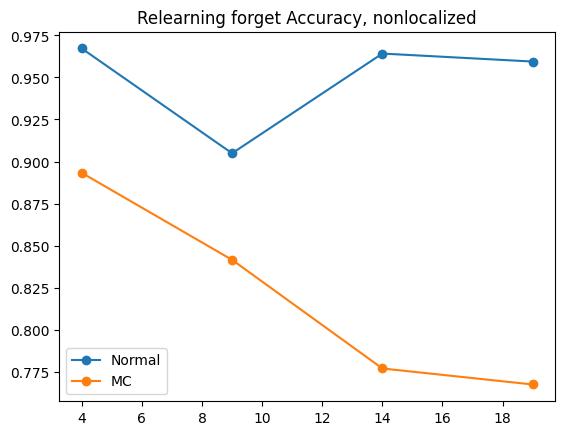

In [8]:
for task_name, task_split in [("Normal", "forget"), ("MC", "forget")]:
    x_vals = []
    y_vals = []
    for idx, point in enumerate(relearning_results["relearning_test_losses"]):
        if len(point) > 0:
            x_vals.append(idx)
            y_vals.append(point['adversarial'][task_name][task_split])
    plt.plot(x_vals, y_vals, label=task_name, marker="o")
plt.title(f"Relearning {task_split} Accuracy, {localization_type}")
plt.legend()
plt.show()

In [10]:
# softprompt results
with open("results_rebuttal/gemma_forget_64_inject_random_without_golf/nonlocalized_run1/results/softprompt_metrics.pkl", "rb") as f:
    softprompt_results = pickle.load(f)

print(softprompt_results)


[{'forget_acc': 0.962973952293396, 'forget_acc_with_injected': 0.050723642110824585, 'maintain_acc': 0.9379807710647583, 'loss_over_time': [{'toward': 0.09334100782871246, 'total': 0.09334100782871246}, {'toward': 0.015815898776054382, 'total': 0.015815898776054382}, {'toward': 0.012661867775022984, 'total': 0.012661867775022984}, {'toward': 0.012110548093914986, 'total': 0.012110548093914986}, {'toward': 0.011317146010696888, 'total': 0.011317146010696888}, {'toward': 0.00947387982159853, 'total': 0.00947387982159853}, {'toward': 0.010240243747830391, 'total': 0.010240243747830391}, {'toward': 0.010538086295127869, 'total': 0.010538086295127869}, {'toward': 0.011330457404255867, 'total': 0.011330457404255867}, {'toward': 0.011009668000042439, 'total': 0.011009668000042439}, {'toward': 0.011376041918992996, 'total': 0.011376041918992996}, {'toward': 0.012790663167834282, 'total': 0.012790663167834282}, {'toward': 0.011722474358975887, 'total': 0.011722474358975887}, {'toward': 0.010370

In [12]:
sum(result["forget_acc"] for result in softprompt_results) / len(softprompt_results)

0.9611598402261734

# Multi Run Graphs

## Train/Test Statistics

In [2]:
localization_types = {"localized_ap": "Localized AP", "localized_ct": "Localized CT", "manual_interp": "Manual Interp", "random": "Random", "all_mlps": "All MLPs", "nonlocalized": "Non-Localized", "random_mlps": "Random MLPs"}
model_names = {"gemma": "Gemma 7b"}#, "gemma2": "Gemma 2 9b", "llama3": "Llama 3 8b"}
forget_splits = {"16": "16 Random Athletes", "64": "64 Random Athletes"}
inject_labels = {"random_without_golf": "Random (No Golf)"}
run_ids = ["1"]
final_epoch = 49

import itertools

# average over forget splits, inject labels, model names, and run_ids. For singular results, have only single elements
configs = list(itertools.product(model_names, forget_splits, inject_labels, run_ids))

test_losses_list = []
adversarial_evals_list = []
# side_effects_evals_list = []
mmlu_evals_list = []

do_probing_evals = True
probing_evals_list = []

do_relearning_evals = True
relearning_evals_list = []

do_softprompt_evals = True
softprompt_evals_list = []

for localization_type in localization_types:
    aggregated_results = []
    # Convert iterator to list and wrap with tqdm for proper progress tracking
    for model_name, forget_split, inject_label, run_id in tqdm(configs, desc=f"Processing {localization_type}"):
        config_dir = {"localization_type": localization_types[localization_type], "model_name": model_name, "forget_split": forget_splits[forget_split], "inject_label": inject_labels[inject_label], "run_id": run_id}

        save_dir = f"results_rebuttal/{model_name}_forget_{forget_split}_inject_{inject_label}/{localization_type}_run{run_id}"
        with open(f"{save_dir}/models/model_metrics.pkl", "rb") as f:
            model_metrics = pickle.load(f)

        for task, value in model_metrics["test_losses"].items():
            test_losses_list.append({
                **config_dir,
                "task_name": task,
                "test_loss": value[-1]
            })
        
        for eval_type, results in model_metrics["adversarial_evals"][final_epoch].items():
            adversarial_evals_list.append({
                **config_dir,
                "eval_type": eval_type,
                "forget": results["forget"],
                "maintain": results["maintain"]
            })
        
        with open(f"{save_dir}/full_capability_dict.pkl", "rb") as f:
            full_capability_dict = pickle.load(f)
        
        mmlu_evals_list.append({
            **config_dir,
            "mmlu": full_capability_dict["results"]["mmlu"]["acc,none"]
        })

        if do_probing_evals:
            with open(f"{save_dir}/results/probing_results.pkl", "rb") as f:
                probing_results = pickle.load(f)
            for layer in range(len(probing_results["forget_ground_truth_accs"])):
                probing_evals_list.append({
                    **config_dir,
                    "layer": layer,
                    "forget_ground_truth_acc": probing_results["forget_ground_truth_accs"][layer],
                    "forget_edit_acc": probing_results["forget_edit_accs"][layer],
                    "maintain_train_acc": probing_results["maintain_train_accs"][layer],
                    "maintain_test_acc": probing_results["maintain_test_accs"][layer]
                })


        if do_relearning_evals:
            with open(f"{save_dir}/results/relearning_results.pkl", "rb") as f:
                relearning_results = pickle.load(f)
            for step in range(len(relearning_results["relearning_test_losses"])):
                relearning_dict = relearning_results["relearning_test_losses"][step]
                if len(relearning_dict) > 0:
                    current_dict = {
                        **config_dir,
                        "step": step,
                        "mmlu": relearning_dict["MMLU"]["MMLU"]
                    }
                    for adversarial_eval_type in relearning_dict["adversarial"].keys():
                        for split in ["forget", "maintain"]:
                            current_dict[f"{adversarial_eval_type}_{split}"] = relearning_dict["adversarial"][adversarial_eval_type][split]
                    relearning_evals_list.append(current_dict)
        
        if do_softprompt_evals:
            with open(f"{save_dir}/results/softprompt_metrics.pkl", "rb") as f:
                softprompt_results = pickle.load(f)
            
            for softprompt_iter in range(len(softprompt_results)):
                softprompt_evals_list.append({
                    **config_dir,
                    "softprompt_iter": softprompt_iter,
                    "forget_acc": softprompt_results[softprompt_iter]["forget_acc"],
                    "forget_acc_with_injected": softprompt_results[softprompt_iter]["forget_acc_with_injected"],
                    "maintain_acc": softprompt_results[softprompt_iter]["maintain_acc"]
                })
            # for task_name, task_split in [("Normal", "forget"), ("MC", "forget")]:
            #     softprompt_evals_list.append({

Processing localized_ap:   0%|          | 0/2 [00:00<?, ?it/s]

Processing localized_ct:   0%|          | 0/2 [00:00<?, ?it/s]

Processing manual_interp:   0%|          | 0/2 [00:00<?, ?it/s]

Processing random:   0%|          | 0/2 [00:00<?, ?it/s]

Processing all_mlps:   0%|          | 0/2 [00:00<?, ?it/s]

Processing nonlocalized:   0%|          | 0/2 [00:00<?, ?it/s]

Processing random_mlps:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
# convert all to dataframes
test_losses_df = pd.DataFrame(test_losses_list)
adversarial_evals_df = pd.DataFrame(adversarial_evals_list)
mmlu_evals_df = pd.DataFrame(mmlu_evals_list)
if do_probing_evals:
    probing_evals_df = pd.DataFrame(probing_evals_list)
if do_relearning_evals:
    relearning_evals_df = pd.DataFrame(relearning_evals_list)
if do_softprompt_evals:
    softprompt_evals_df = pd.DataFrame(softprompt_evals_list)

In [4]:
# Define colors for each localization type
colors = {"Localized AP": "#e74c3c", "Localized CT": "#2ecc71", "Manual Interp": "#3498db", "Random": "#f1c40f", "All MLPs": "#9b59b6", "Non-Localized": "#1abc9c", "Random MLPs": "#e67e22"}

### Test Evals

In [5]:
test_losses_df[test_losses_df["task_name"].isin(["forget_sport_accuracy", "maintain_sport_accuracy"])].groupby(["localization_type", "task_name"]).mean(numeric_only=True)

test_loss
localization_type task_name                         
All MLPs          forget_sport_accuracy     0.000083
                  maintain_sport_accuracy   0.993339
Localized AP      forget_sport_accuracy     0.010642
                  maintain_sport_accuracy   0.683008
Localized CT      forget_sport_accuracy     0.019234
                  maintain_sport_accuracy   0.709959
Manual Interp     forget_sport_accuracy     0.000005
                  maintain_sport_accuracy   0.995643
Non-Localized     forget_sport_accuracy     0.000290
                  maintain_sport_accuracy   0.987792
Random            forget_sport_accuracy     0.000013
                  maintain_sport_accuracy   0.990550
Random MLPs       forget_sport_accuracy     0.000492
                  maintain_sport_accuracy   0.986949

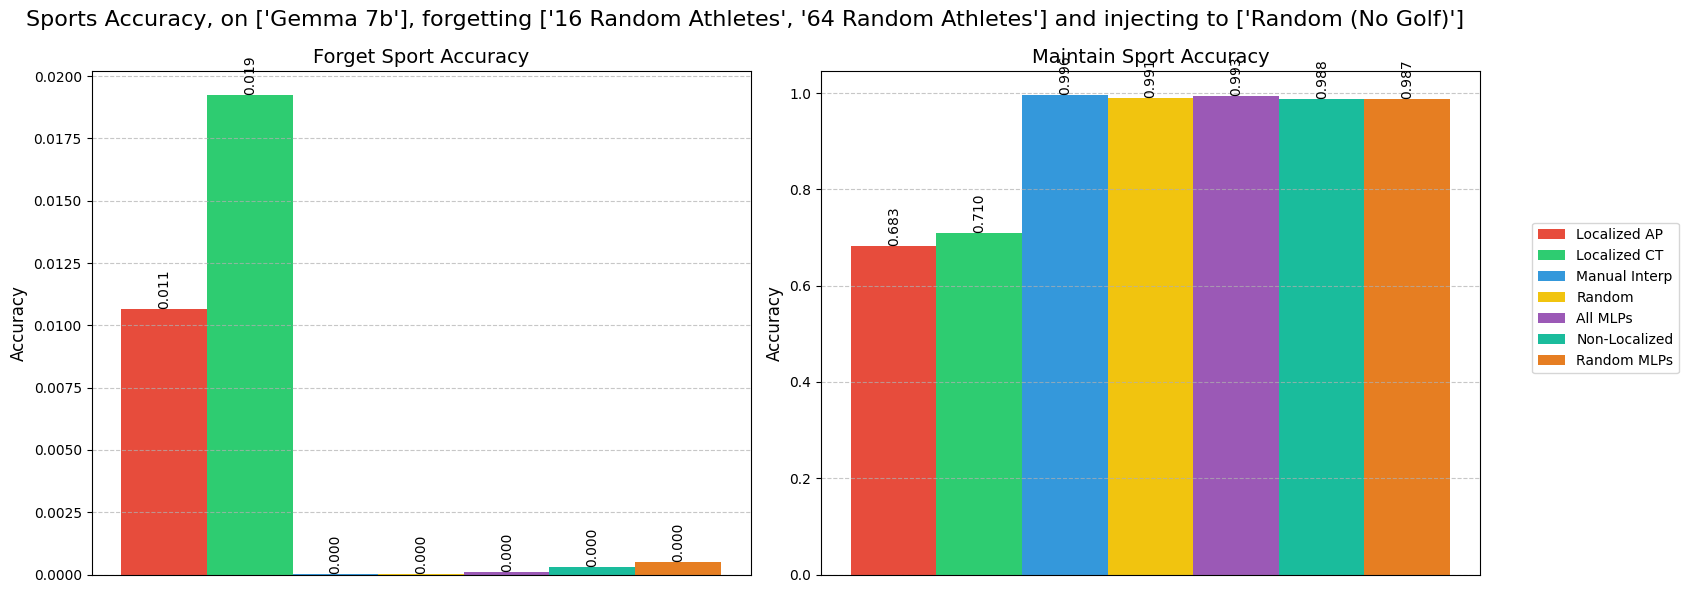

In [6]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

loc_types = test_losses_df['localization_type'].unique()
width = 0.12
x = np.arange(1)  # Only one bar position per subplot

# Plot Forget Sport Accuracy
for idx, loc_type in enumerate(loc_types):
    data = test_losses_df[test_losses_df['localization_type'] == loc_type]
    forget_acc = data[data['task_name'] == 'forget_sport_accuracy']['test_loss'].mean()
    
    # Calculate bar position
    bar_position = x + idx*width - (len(loc_types)-1)*width/2
    
    # Create bar
    bar = ax1.bar(bar_position, forget_acc, width, label=loc_type, color=colors[loc_type])
    
    # Add value label
    ax1.text(bar_position[0], forget_acc, f'{forget_acc:.3f}',
             ha='center', va='bottom', rotation=90)

# Plot Maintain Sport Accuracy
for idx, loc_type in enumerate(loc_types):
    data = test_losses_df[test_losses_df['localization_type'] == loc_type]
    maintain_acc = data[data['task_name'] == 'maintain_sport_accuracy']['test_loss'].mean()
    
    # Calculate bar position
    bar_position = x + idx*width - (len(loc_types)-1)*width/2
    
    # Create bar
    bar = ax2.bar(bar_position, maintain_acc, width, label=loc_type, color=colors[loc_type])
    
    # Add value label
    ax2.text(bar_position[0], maintain_acc, f'{maintain_acc:.3f}',
             ha='center', va='bottom', rotation=90)

# Customize plots
ax1.set_ylabel('Accuracy', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Forget Sport Accuracy', fontsize=14)
ax2.set_title('Maintain Sport Accuracy', fontsize=14)
plt.suptitle(f"Sports Accuracy, on {list(model_names.values())}, forgetting {list(forget_splits.values())} and injecting to {list(inject_labels.values())}", fontsize=16)

# Remove x ticks
ax1.set_xticks([])
ax2.set_xticks([])

# Add grid
ax1.grid(True, linestyle='--', alpha=0.7)
ax2.grid(True, linestyle='--', alpha=0.7)

# Add single legend to the right
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

### Adversarial Evals

In [7]:
adversarial_evals_df.groupby(["localization_type", "eval_type"]).mean(numeric_only=True)

forget  maintain
localization_type eval_type                          
All MLPs          MC               0.151265  0.373283
                  MC_Injected      0.281560  0.119721
                  Normal           0.037771  0.833202
                  Normal_Injected  0.939935  0.088667
Localized AP      MC               0.828708  0.834481
                  MC_Injected      0.051332  0.068375
                  Normal           0.096836  0.489452
                  Normal_Injected  0.834987  0.232772
Localized CT      MC               0.758900  0.785060
                  MC_Injected      0.065923  0.074529
                  Normal           0.121060  0.497637
                  Normal_Injected  0.766323  0.244588
Manual Interp     MC               0.061398  0.919185
                  MC_Injected      0.869169  0.028324
                  Normal           0.011783  0.971583
                  Normal_Injected  0.978770  0.013252
Non-Localized     MC               0.130572  0.235544
                  MC_Injected      0.188182  0.113493
                  Normal           0.098590  0.768932
                  Normal_Injected  0.850824  0.109183
Random            MC               0.136297  0.417991
                  MC_Injected      0.351855  0.104038
                  Normal           0.043296  0.754415
                  Normal_Injected  0.917961  0.121774
Random MLPs       MC               0.765159  0.798835
                  MC_Injected      0.067802  0.069135
                  Normal           0.353190  0.762328
                  Normal_Injected  0.545528  0.115679

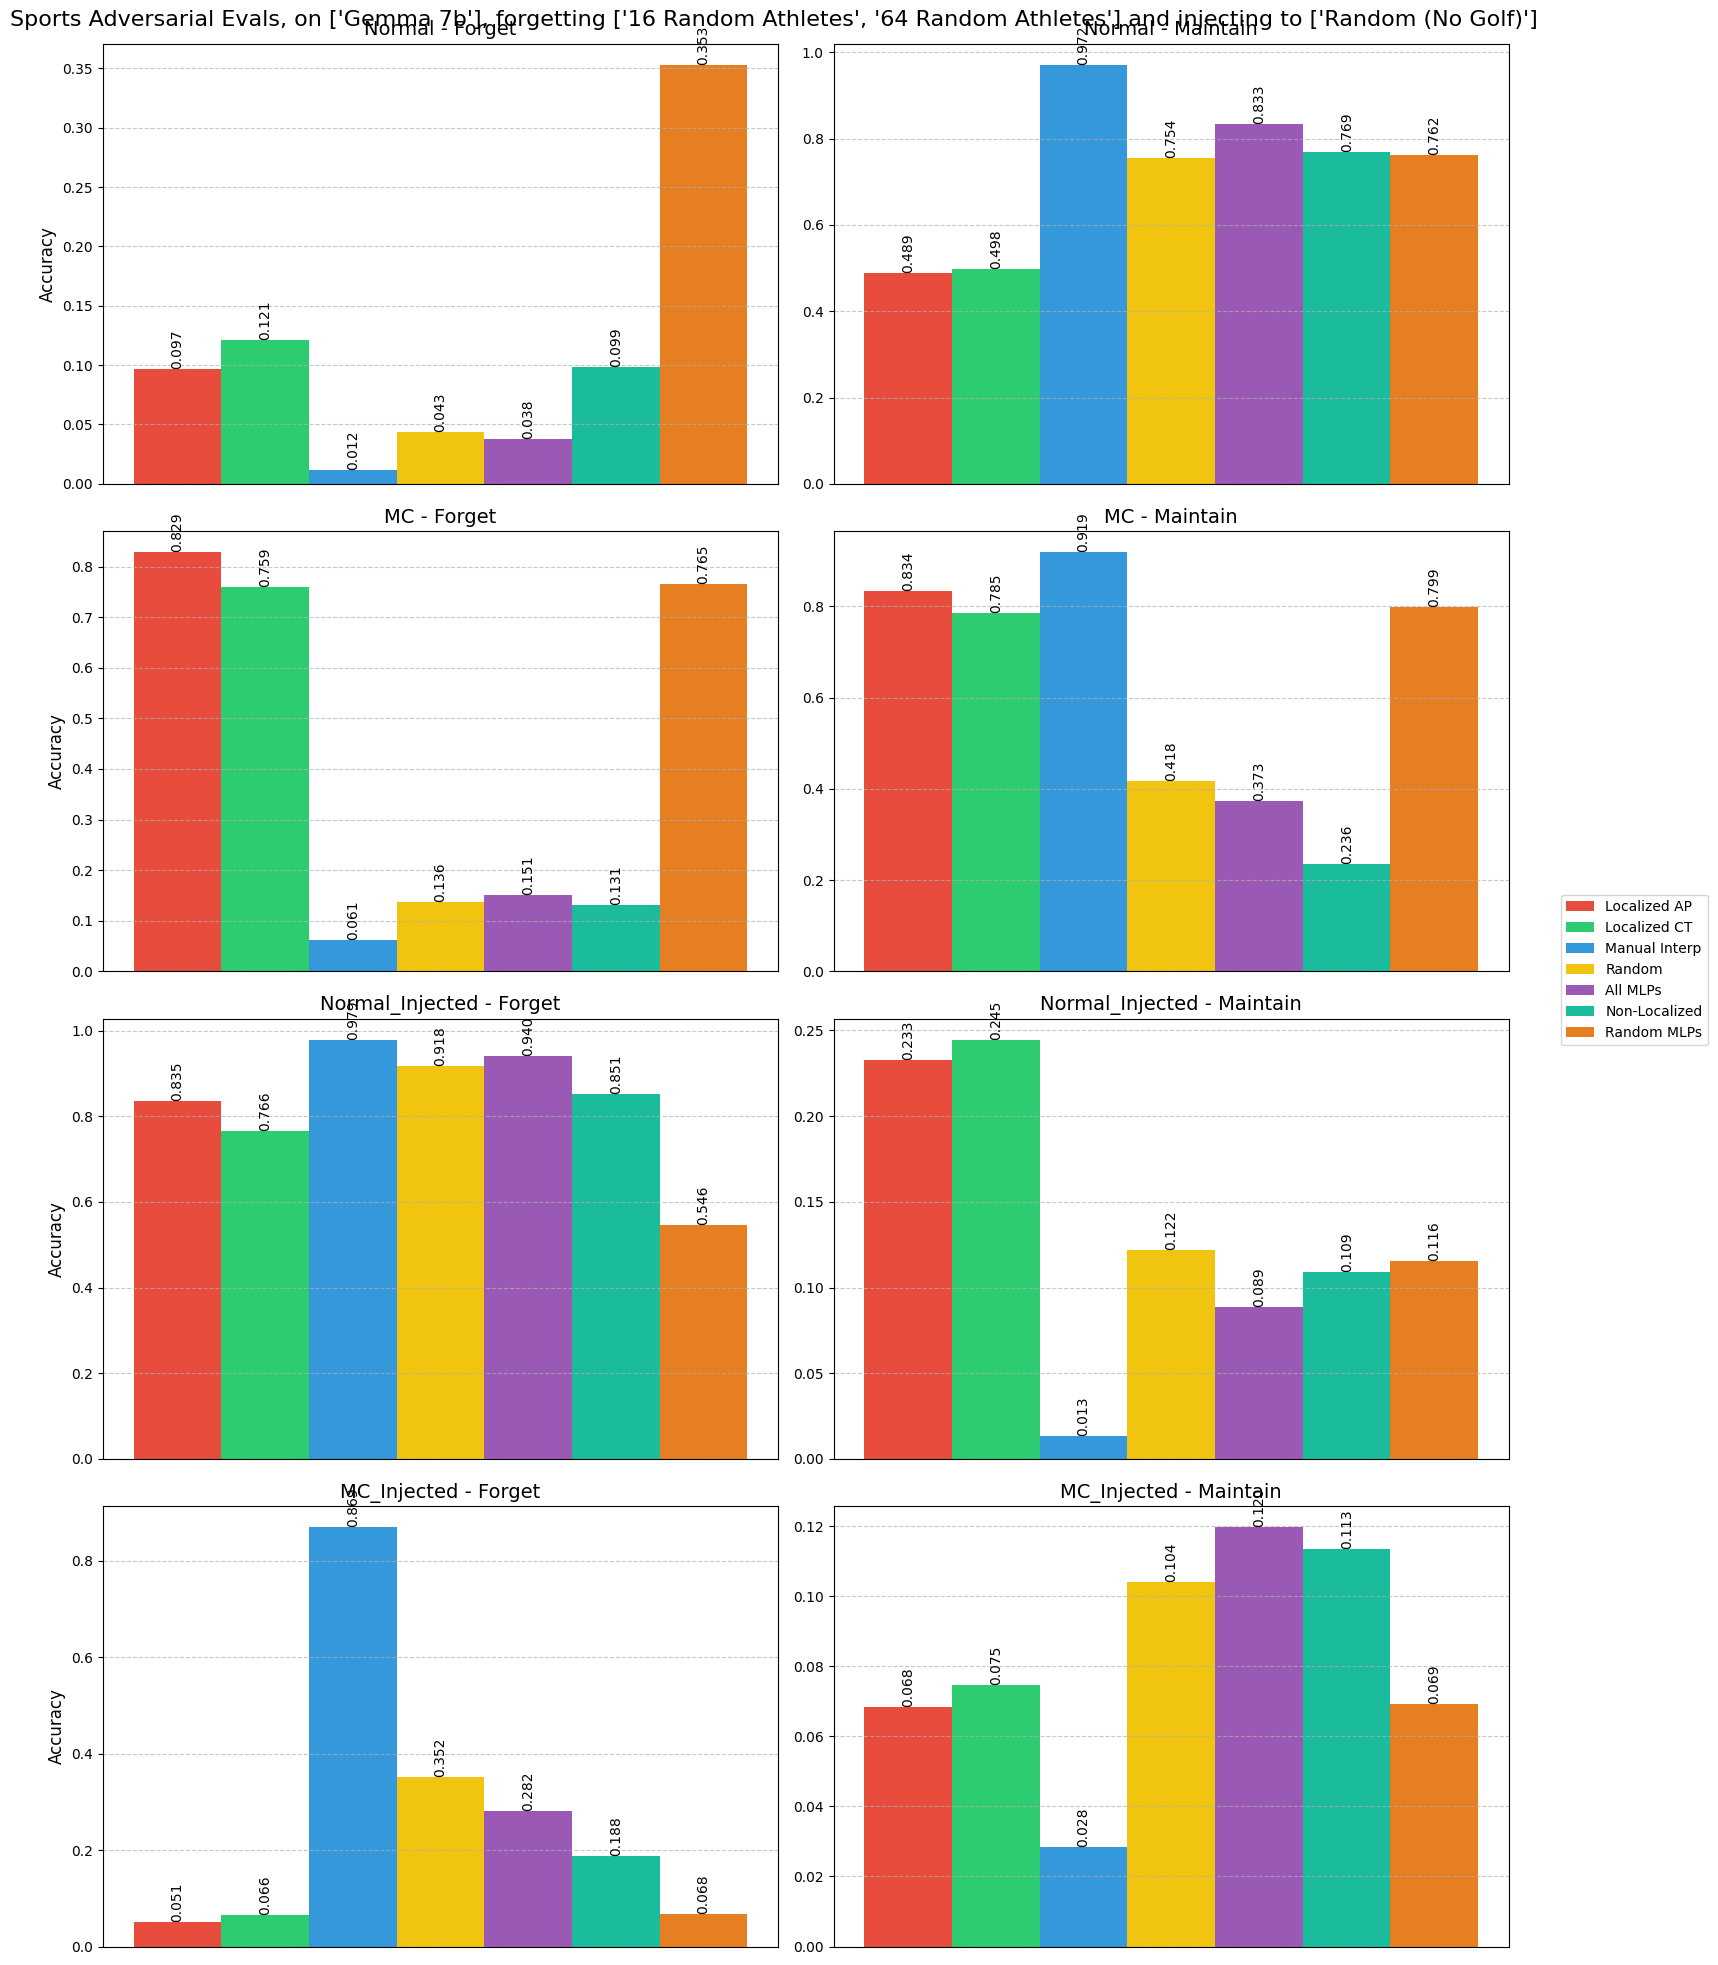

In [8]:
# Create figure and subplots - one row for each eval_type
eval_types = adversarial_evals_df['eval_type'].unique()
fig, axes = plt.subplots(len(eval_types), 2, figsize=(15, 5*len(eval_types)))

loc_types = adversarial_evals_df['localization_type'].unique()
width = 0.12
x = np.arange(1)  # Single bar position per subplot

# Plot each eval_type in a row
for row_idx, eval_type in enumerate(eval_types):
    data = adversarial_evals_df[adversarial_evals_df['eval_type'] == eval_type]
    
    # Plot Forget Accuracy (left column)
    for idx, loc_type in enumerate(loc_types):
        loc_data = data[data['localization_type'] == loc_type]
        forget_acc = loc_data['forget'].mean()
        
        # Calculate bar position
        bar_position = x + idx*width - (len(loc_types)-1)*width/2
        
        # Create bar
        bar = axes[row_idx, 0].bar(bar_position, forget_acc, width, 
                                  label=loc_type, color=colors[loc_type])
        
        # Add value label
        axes[row_idx, 0].text(bar_position[0], forget_acc, f'{forget_acc:.3f}',
                             ha='center', va='bottom', rotation=90)
    
    # Plot Maintain Accuracy (right column)
    for idx, loc_type in enumerate(loc_types):
        loc_data = data[data['localization_type'] == loc_type]
        maintain_acc = loc_data['maintain'].mean()
        
        # Calculate bar position
        bar_position = x + idx*width - (len(loc_types)-1)*width/2
        
        # Create bar
        bar = axes[row_idx, 1].bar(bar_position, maintain_acc, width, 
                                  label=loc_type, color=colors[loc_type])
        
        # Add value label
        axes[row_idx, 1].text(bar_position[0], maintain_acc, f'{maintain_acc:.3f}',
                             ha='center', va='bottom', rotation=90)
    
    # Customize each subplot
    axes[row_idx, 0].set_ylabel('Accuracy', fontsize=12)
    axes[row_idx, 0].set_title(f'{eval_type} - Forget', fontsize=14)
    axes[row_idx, 1].set_title(f'{eval_type} - Maintain', fontsize=14)
    
    # Remove x ticks
    axes[row_idx, 0].set_xticks([])
    axes[row_idx, 1].set_xticks([])
    
    # Add grid
    axes[row_idx, 0].grid(True, linestyle='--', alpha=0.7)
    axes[row_idx, 1].grid(True, linestyle='--', alpha=0.7)

# Add single legend to the right
plt.suptitle(f"Sports Adversarial Evals, on {list(model_names.values())}, forgetting {list(forget_splits.values())} and injecting to {list(inject_labels.values())}", fontsize=16)
handles, labels = axes[0, 1].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

### MMLU Evals

In [9]:
mmlu_evals_df.groupby("localization_type").mean(numeric_only=True)

,mmlu
localization_type,
All MLPs,0.609671
Localized AP,0.614407
Localized CT,0.614264
Manual Interp,0.619071
Non-Localized,0.607962
Random,0.614336
Random MLPs,0.616294


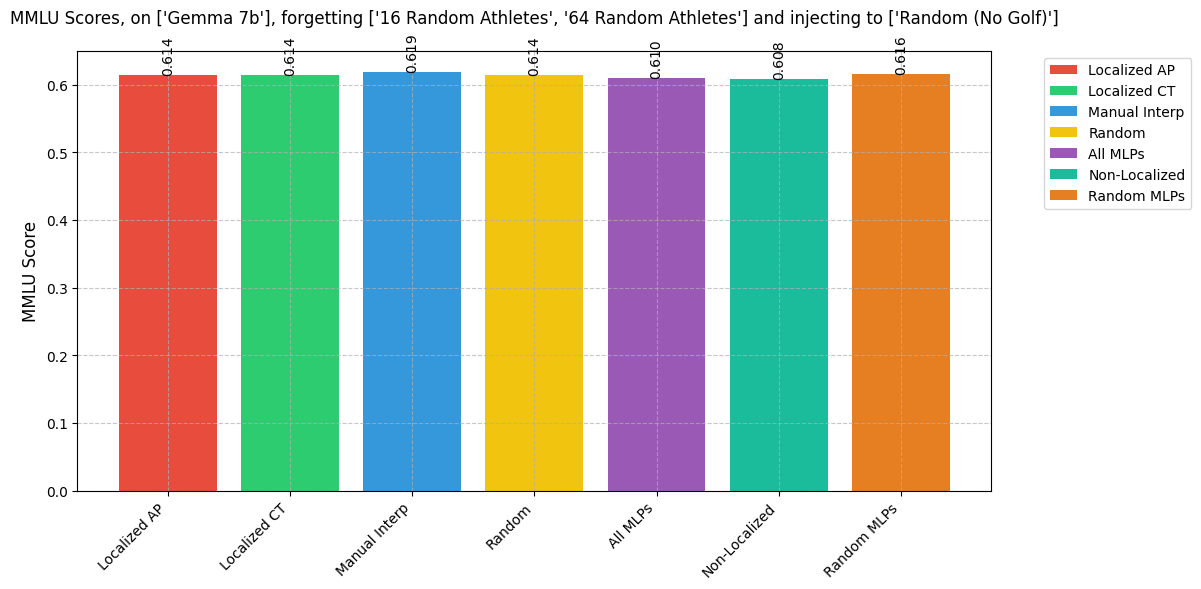

In [10]:
# Create figure
plt.figure(figsize=(12, 6))

# Get data
loc_types = mmlu_evals_df['localization_type'].unique()
mmlu_scores = [mmlu_evals_df[mmlu_evals_df['localization_type'] == loc_type]['mmlu'].mean() 
               for loc_type in loc_types]

# Create bars
bars = plt.bar(range(len(loc_types)), mmlu_scores, color=[colors[loc_type] for loc_type in loc_types])

# Add value labels above each bar
for idx, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}',
            ha='center', va='bottom', rotation=90)

# Customize plot
plt.ylabel('MMLU Score', fontsize=12)
plt.title(f'MMLU Scores, on {list(model_names.values())}, forgetting {list(forget_splits.values())} and injecting to {list(inject_labels.values())}', fontsize=12, pad=20)
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis labels
plt.xticks(range(len(loc_types)), loc_types, rotation=45, ha='right')

# Add legend
plt.legend(bars, loc_types, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

plt.show()

### Probing Evals

In [14]:
probing_evals_df.groupby(["localization_type", "layer"])[["forget_ground_truth_acc", "forget_edit_acc"]].mean(numeric_only=True)

forget_ground_truth_acc  forget_edit_acc
localization_type layer                                          
All MLPs          0                     0.460938         0.281250
                  1                     0.414062         0.289062
                  2                     0.523438         0.265625
                  3                     0.531250         0.296875
                  4                     0.531250         0.281250
...                                          ...              ...
Random MLPs       23                    0.679688         0.320312
                  24                    0.523438         0.476562
                  25                    0.468750         0.531250
                  26                    0.359375         0.640625
                  27                    0.304688         0.695312

[196 rows x 2 columns]

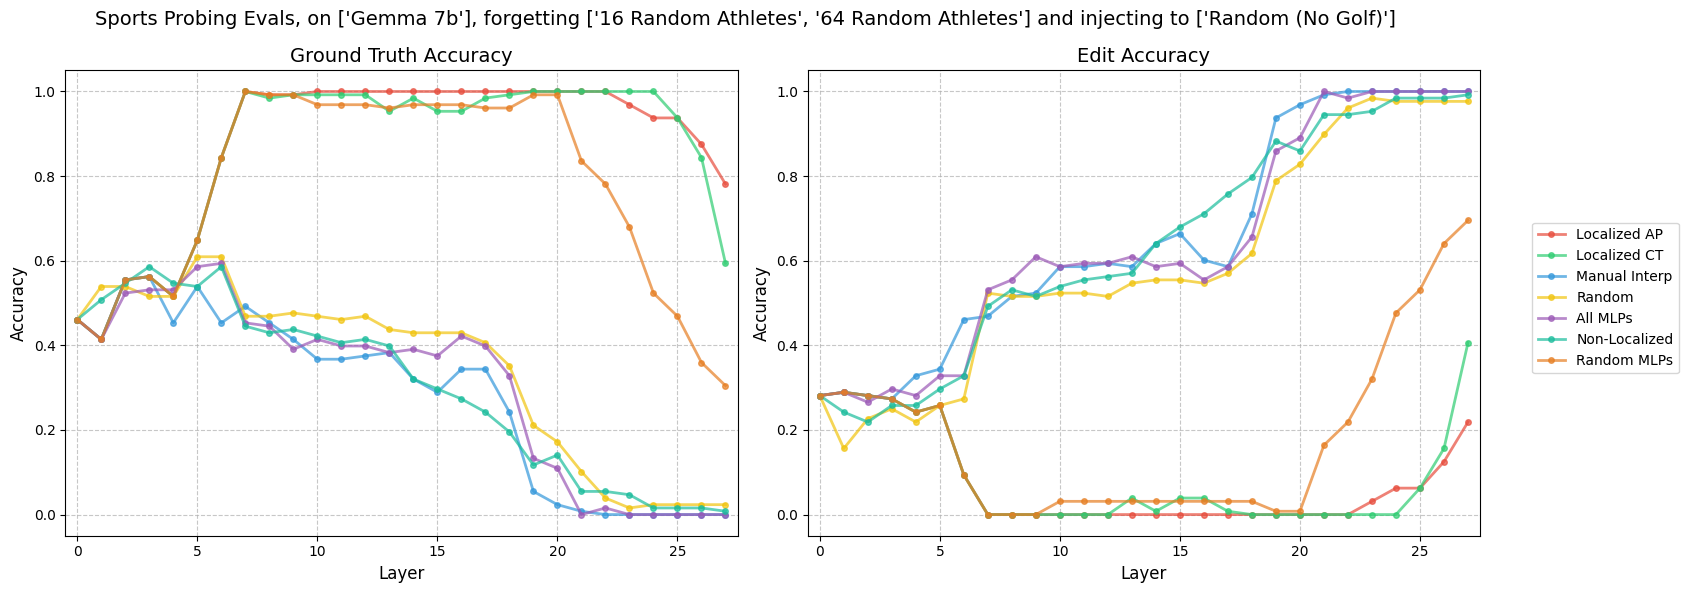

In [17]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

loc_types = probing_evals_df['localization_type'].unique()
layers = probing_evals_df['layer'].unique()

# Plot Ground Truth Accuracy
for loc_type in loc_types:
    data = probing_evals_df[probing_evals_df['localization_type'] == loc_type]
    ground_truth_vals = [data[data['layer'] == layer]['forget_ground_truth_acc'].mean() 
                        for layer in layers]
    
    ax1.plot(layers, ground_truth_vals, 'o-', label=loc_type, 
             color=colors[loc_type], alpha=0.7, markersize=4, linewidth=2)

# Plot Edit Accuracy
for loc_type in loc_types:
    data = probing_evals_df[probing_evals_df['localization_type'] == loc_type]
    edit_vals = [data[data['layer'] == layer]['forget_edit_acc'].mean() 
                 for layer in layers]
    
    ax2.plot(layers, edit_vals, 'o-', label=loc_type, 
             color=colors[loc_type], alpha=0.7, markersize=4, linewidth=2)

# Customize plots
for ax, title in zip([ax1, ax2], ['Ground Truth Accuracy', 'Edit Accuracy']):
    ax.set_xlabel('Layer', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlim(-0.5, len(layers)-0.5)

plt.suptitle(f"Sports Probing Evals, on {list(model_names.values())}, forgetting {list(forget_splits.values())} and injecting to {list(inject_labels.values())}", fontsize=14)
# Add single legend to the right
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')

# Adjust layout
plt.tight_layout()

plt.show()

### Softprompt Evals

In [22]:
softprompt_evals_df.groupby(["localization_type"]).mean(numeric_only=True).drop("softprompt_iter", axis=1)

,forget_acc,forget_acc_with_injected,maintain_acc
localization_type,,,
All MLPs,0.355102,0.526110,0.789885
Localized AP,0.603426,0.307308,0.824249
Localized CT,0.564596,0.239072,0.751768
Manual Interp,0.381137,0.529034,0.767339
Non-Localized,0.349004,0.525883,0.788505
Random,0.345366,0.416907,0.483086
Random MLPs,0.653347,0.233679,0.875158


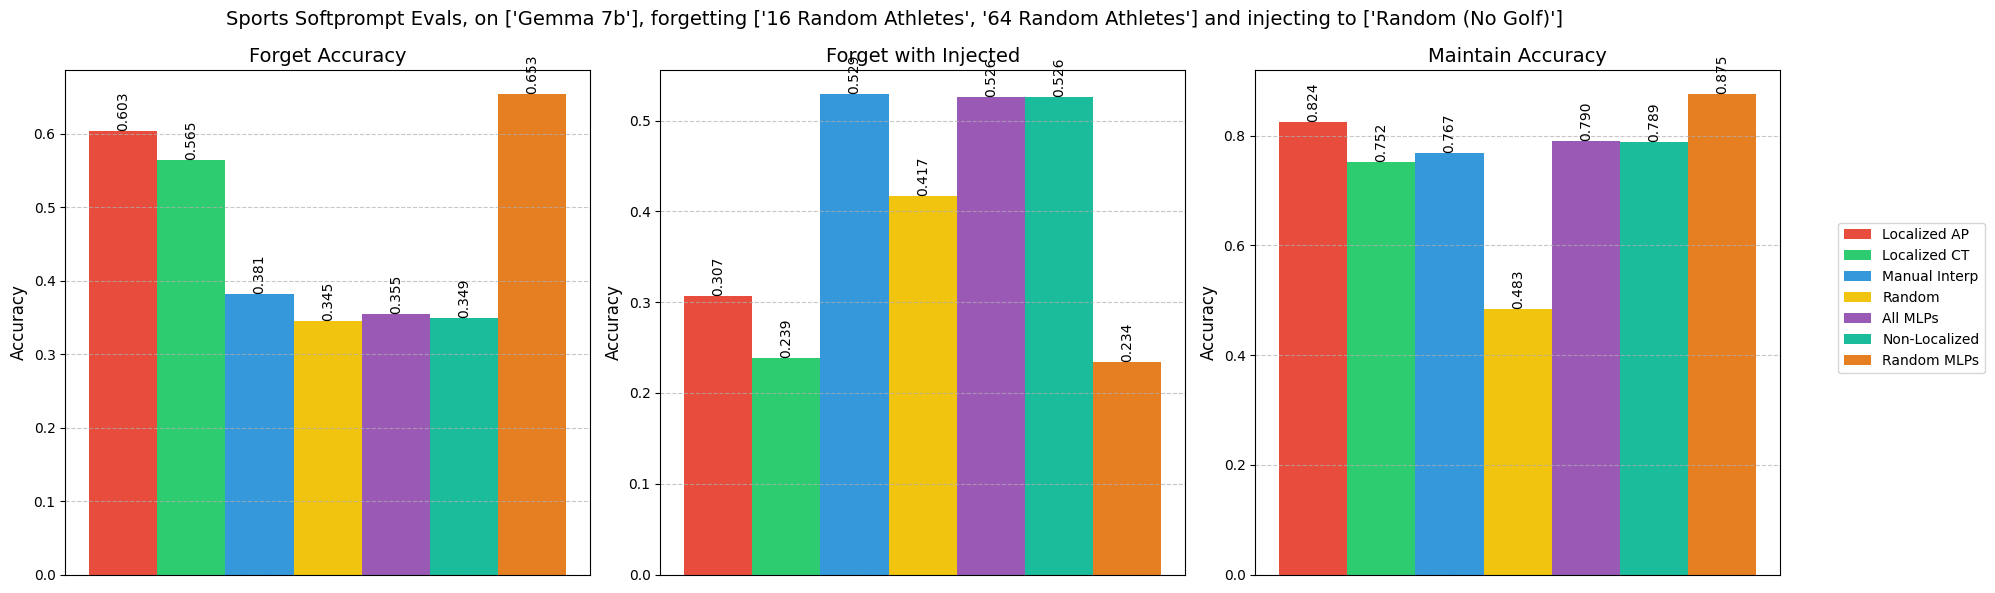

In [24]:
# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

loc_types = softprompt_evals_df['localization_type'].unique()
width = 0.12
x = np.arange(1)  # Single bar position per subplot

# Plot Forget Accuracy
for idx, loc_type in enumerate(loc_types):
    data = softprompt_evals_df[softprompt_evals_df['localization_type'] == loc_type]
    forget_acc = data['forget_acc'].mean()
    
    # Calculate bar position
    bar_position = x + idx*width - (len(loc_types)-1)*width/2
    
    # Create bar
    bar = ax1.bar(bar_position, forget_acc, width, label=loc_type, color=colors[loc_type])
    
    # Add value label
    ax1.text(bar_position[0], forget_acc, f'{forget_acc:.3f}',
             ha='center', va='bottom', rotation=90)

# Plot Forget with Injected Accuracy
for idx, loc_type in enumerate(loc_types):
    data = softprompt_evals_df[softprompt_evals_df['localization_type'] == loc_type]
    forget_injected_acc = data['forget_acc_with_injected'].mean()
    
    # Calculate bar position
    bar_position = x + idx*width - (len(loc_types)-1)*width/2
    
    # Create bar
    bar = ax2.bar(bar_position, forget_injected_acc, width, label=loc_type, color=colors[loc_type])
    
    # Add value label
    ax2.text(bar_position[0], forget_injected_acc, f'{forget_injected_acc:.3f}',
             ha='center', va='bottom', rotation=90)

# Plot Maintain Accuracy
for idx, loc_type in enumerate(loc_types):
    data = softprompt_evals_df[softprompt_evals_df['localization_type'] == loc_type]
    maintain_acc = data['maintain_acc'].mean()
    
    # Calculate bar position
    bar_position = x + idx*width - (len(loc_types)-1)*width/2
    
    # Create bar
    bar = ax3.bar(bar_position, maintain_acc, width, label=loc_type, color=colors[loc_type])
    
    # Add value label
    ax3.text(bar_position[0], maintain_acc, f'{maintain_acc:.3f}',
             ha='center', va='bottom', rotation=90)

# Customize plots
for ax, title in zip([ax1, ax2, ax3], ['Forget Accuracy', 'Forget with Injected', 'Maintain Accuracy']):
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.set_xticks([])
    ax.grid(True, linestyle='--', alpha=0.7)

# Add single legend to the right
handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.suptitle(f"Sports Softprompt Evals, on {list(model_names.values())}, forgetting {list(forget_splits.values())} and injecting to {list(inject_labels.values())}", fontsize=14)
# Adjust layout
plt.tight_layout()

plt.show()

### Relearning Evals

In [28]:
relearning_evals_df.groupby(["localization_type", "step"]).mean(numeric_only=True)[["Normal_Injected_forget", "MC_Injected_forget"]]

Normal_Injected_forget  MC_Injected_forget
localization_type step                                            
All MLPs          0                   0.999899            0.350142
                  5                   0.577137            0.128475
                  10                  0.630538            0.140897
                  15                  0.626699            0.148069
                  20                  0.632654            0.153515
Localized AP      0                   0.984131            0.124406
                  5                   0.402305            0.026604
                  10                  0.183036            0.031790
                  15                  0.130014            0.027849
                  20                  0.101035            0.024131
Localized CT      0                   0.965562            0.094049
                  5                   0.429927            0.058344
                  10                  0.136952            0.048026
                  15                  0.061420            0.043272
                  20                  0.035224            0.042304
Manual Interp     0                   0.999994            0.939851
                  5                   0.586066            0.373442
                  10                  0.854035            0.236010
                  15                  0.680349            0.242071
                  20                  0.708735            0.248993
Non-Localized     0                   0.999524            0.218128
                  5                   0.604203            0.163832
                  10                  0.618842            0.153710
                  15                  0.611610            0.137229
                  20                  0.594892            0.138264
Random            0                   0.999978            0.165599
                  5                   0.492062            0.137783
                  10                  0.548047            0.141733
                  15                  0.443421            0.130227
                  20                  0.470545            0.130680
Random MLPs       0                   0.999525            0.089118
                  5                   0.179678            0.110555
                  10                  0.009325            0.095860
                  15                  0.125678            0.110731
                  20                  0.125533            0.111511

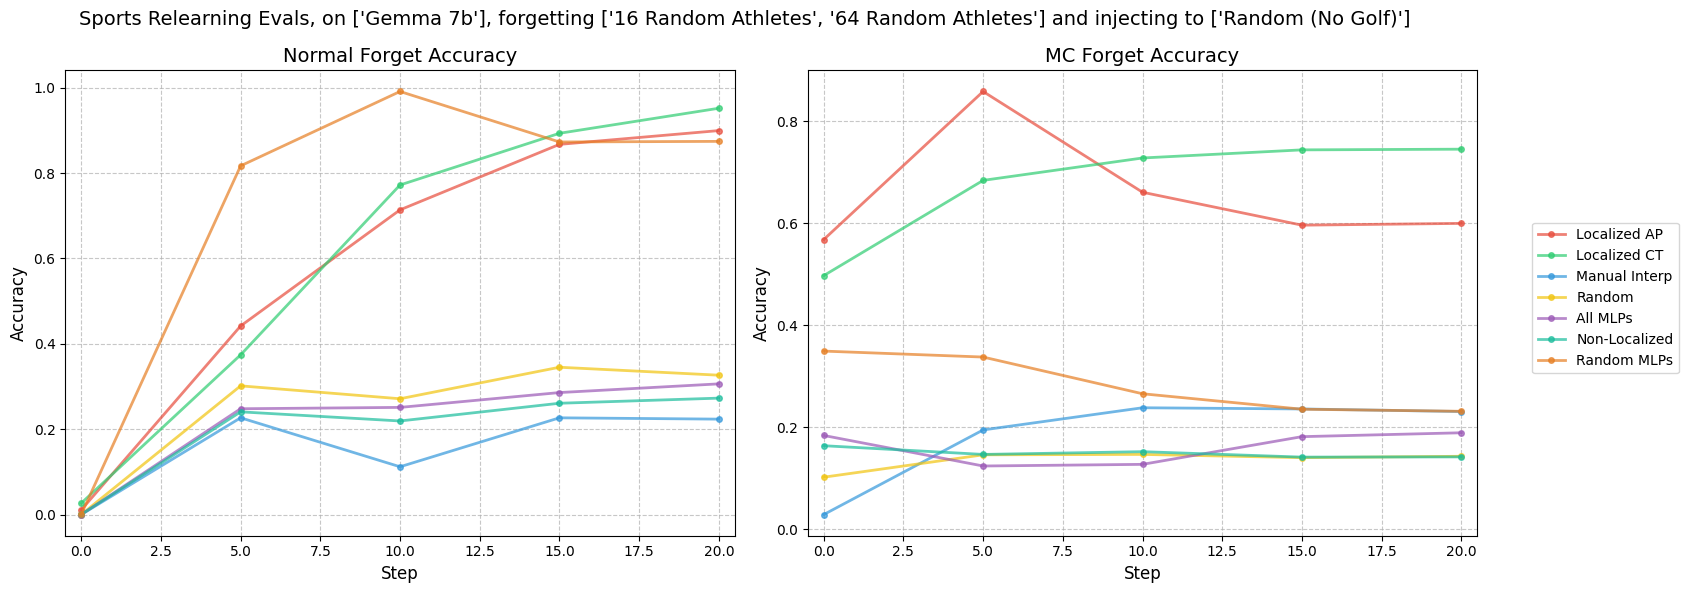

In [34]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

loc_types = relearning_evals_df['localization_type'].unique()
steps = relearning_evals_df['step'].unique()

# Plot Normal Injected Forget
for loc_type in loc_types:
    data = relearning_evals_df[relearning_evals_df['localization_type'] == loc_type]
    normal_forget_vals = [data[data['step'] == step]['Normal_forget'].mean() 
                           for step in steps]
    
    ax1.plot(steps, normal_forget_vals, 'o-', label=loc_type, 
             color=colors[loc_type], alpha=0.7, markersize=4, linewidth=2)

# Plot MC Injected Forget
for loc_type in loc_types:
    data = relearning_evals_df[relearning_evals_df['localization_type'] == loc_type]
    mc_forget_vals = [data[data['step'] == step]['MC_forget'].mean() 
                        for step in steps]
    
    ax2.plot(steps, mc_forget_vals, 'o-', label=loc_type, 
             color=colors[loc_type], alpha=0.7, markersize=4, linewidth=2)

# Customize plots
for ax, title in zip([ax1, ax2], ['Normal Forget Accuracy', 'MC Forget Accuracy']):
    ax.set_xlabel('Step', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlim(-0.5, max(steps)+0.5)

# Add single legend to the right
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.suptitle(f"Sports Relearning Evals, on {list(model_names.values())}, forgetting {list(forget_splits.values())} and injecting to {list(inject_labels.values())}", fontsize=14)
# Adjust layout
plt.tight_layout()

plt.show()